In [59]:
import numpy as np
from matplotlib.pyplot import * 
from math import sqrt
import numba

In [60]:
@numba.jit(nopython=True)
def colored_noise_euler_integration(x_0, tau, c, dt=0.01, t_stop=60):
    """
    Use Euler integration to solve ODEs
    """    
    mu=np.exp(-dt/tau)
    sigma= sqrt( ((c * tau)/2) * (1-mu**2) )
    
    # Time points
    t = np.linspace(0, t_stop, int(t_stop/dt))
    
    # Initialize output array
    x = x_0 * np.ones_like(t)
    
    for i in range(0, len(t) - 1):
        x[i+1] = x[i]* mu + sigma * np.random.normal()
        
    return t, x

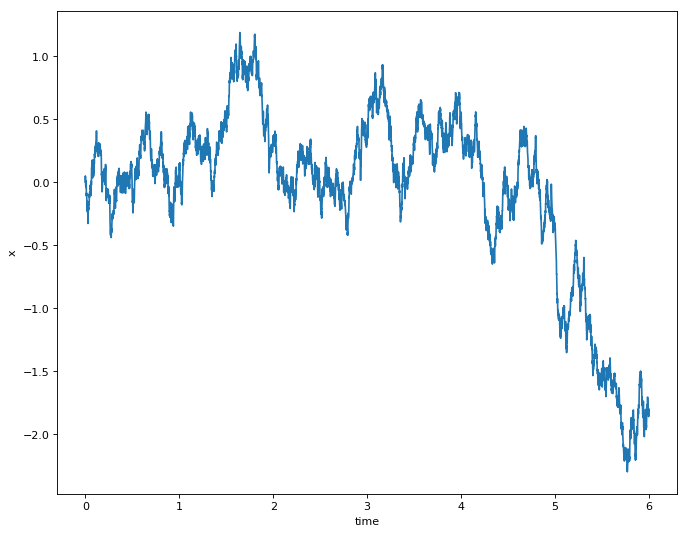

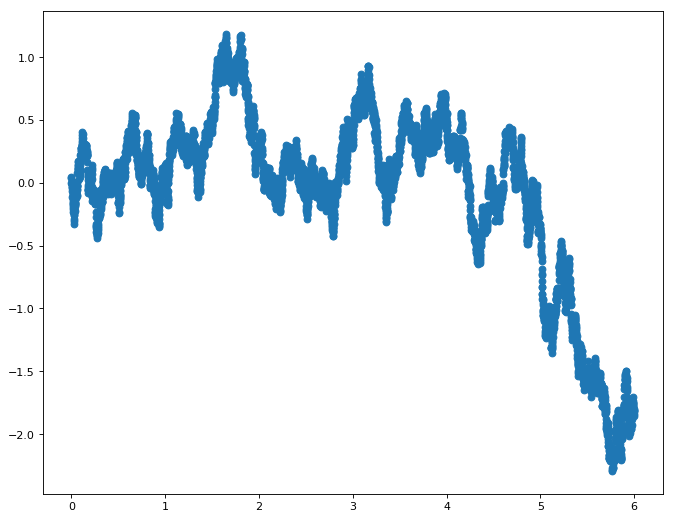

In [61]:
# Specify parameters
x_0 = 0
tau = 1
c=1

# Perform the solution
t, x = colored_noise_euler_integration(x_0, tau, c, dt=0.001, t_stop=10000)

# Plot the result
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot(t[:6000], x[:6000])
xlabel('time')
ylabel('x')
show()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
scatter(t[:6000], x[:6000])
show()

In [51]:
t[600]

0.6000100001666695

In [55]:
sqrt(4)

2.0

In [73]:
t

array([  0.00000000e+00,   1.00000010e-03,   2.00000020e-03, ...,
         9.99999800e+03,   9.99999900e+03,   1.00000000e+04])

In [91]:
int(10/0.001)
t[int(4/0.001)]

4.0000004000000402

In [87]:
np.where(t==1.00000000e+04)

(array([9999999]),)

In [102]:
x=np.zeros((10,16))

x[0,:]=np.random.rand(16)
print(x)

[[ 0.39727358  0.40218551  0.59789245  0.20199548  0.21853984  0.46499088
   0.75222784  0.84638371  0.97413741  0.67172984  0.7957598   0.19294719
   0.69201825  0.38763863  0.1908405   0.47544159]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.    

In [104]:
for i in range(0,10-1):
    x[i+1,:]=np.random.rand(16)

In [105]:
x

array([[  3.97273581e-01,   4.02185507e-01,   5.97892445e-01,
          2.01995483e-01,   2.18539836e-01,   4.64990884e-01,
          7.52227840e-01,   8.46383706e-01,   9.74137413e-01,
          6.71729838e-01,   7.95759797e-01,   1.92947192e-01,
          6.92018250e-01,   3.87638626e-01,   1.90840504e-01,
          4.75441589e-01],
       [  1.96221165e-01,   5.56950205e-01,   1.23173987e-01,
          6.34143435e-01,   1.82781290e-01,   5.98763188e-02,
          2.83171429e-02,   6.16626629e-01,   6.66897392e-01,
          4.06605056e-01,   4.59333100e-01,   3.85970248e-01,
          6.44559717e-01,   8.28167593e-01,   4.81650806e-01,
          1.86728279e-01],
       [  1.19822569e-01,   9.55643372e-01,   4.22812997e-01,
          8.53554379e-01,   4.03254223e-01,   5.68843943e-01,
          7.63987637e-01,   4.03813070e-02,   2.80133559e-01,
          8.74667915e-01,   5.59588362e-01,   1.73556001e-01,
          2.36939515e-01,   3.98377977e-01,   9.45210297e-01,
          2.2952

In [112]:
np.array([2,2,2])**2

array([4, 4, 4])

In [111]:
len(t[indexes])

10000